<div style="text-align: right"> Karina Chiñas Fuentes </div>
<div style="text-align: right"> Matrikelnummer: 3578458 </div>
<div style="text-align: right"> 18/01/22 </div>


**Dr. Ing. Burkhard Plaum** \\
**PhD-Student Andreas Hentrich**

---

# Microwave Technology: Exercise 5
#### Radiation Diagram of a Diapole Antenna

In [1]:
import numpy as np
import sympy as sp 
import matplotlib.pyplot as plt

from numpy import pi as π
from scipy.integrate import quad

sp.init_printing(use_unicode=True)

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

Field strengt:

$$
    |\vec{E}| = \frac{\cos\left(\frac{\pi}{2}\cdot\sin(\theta)\right)}{\cos(\theta)}
$$

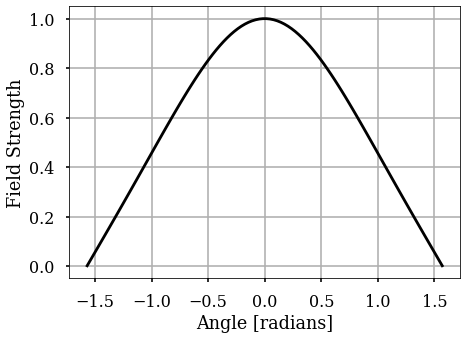

In [2]:
Field_Strengt = lambda θ: np.cos( (π/2)*np.sin(θ) )/np.cos(θ)
α = (π/2)*0.999

angle = np.linspace(-α,α,100) 
FS_of_angle = Field_Strengt(angle)

plt.figure(figsize=(7,5))
plt.plot(angle, FS_of_angle,c="k")
plt.xlabel("Angle [radians]")
plt.ylabel("Field Strength")
plt.grid();

Power:

$$
    P(\Delta\theta,\Delta\varphi) = \int_{\theta_1}^{\theta_2}\int_{\varphi_1}^{\varphi_2} d\theta d\varphi \:P_{\text{density}}\:\: r^2\sin(\theta)
$$

Analysis under a almost full solid angle:

$$
    P(\alpha) = \frac{r^2}{z_0}\int_{α}^{-α}\int_{0}^{2\pi} d\theta d\varphi \: \left(\frac{\cos\left(\frac{\pi}{2}\cdot\sin(\theta)\right)}{\cos(\theta)}\right)^2 \:\: \sin(\theta)
$$

$$
    P(\alpha) = \frac{2\pi r^2}{z_0}\int_{α}^{-α}d\theta \: \frac{\cos^2\left(\frac{\pi}{2}\cdot\sin(\theta)\right)}{\cos^2(\theta)} \:\: \sin(\theta)
$$

With $\alpha = 0.999\frac{\pi}{2}$

Integrand:

$$
    \frac{\cos^2\left(\frac{\pi}{2}\cdot\sin(\theta)\right)}{\cos^2(\theta)} \:\: \sin(\theta)
$$


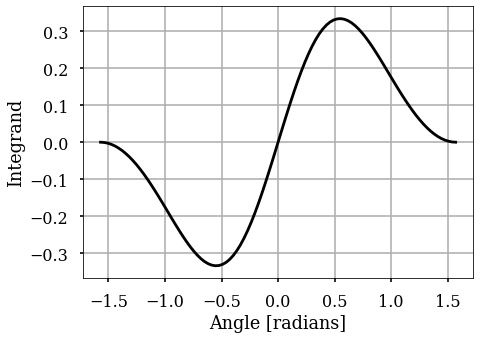

In [3]:
P_integral_func = lambda θ: ((np.cos((π/2)*np.sin(θ))/np.cos(θ))**2)*np.sin(θ)
P_integral = P_integral_func(angle)

plt.figure(figsize=(7,5))
plt.plot(angle, P_integral,c="k")
plt.xlabel("Angle [radians]")
plt.ylabel("Integrand")
plt.grid();

In [4]:
def integral(x):
    I = (( sp.cos((π/2)*sp.sin(x))/sp.cos(x) )**2)*sp.sin(x)
    return I

Integral_α = quad(integral,-α,α)[0]
Integral_α

In [5]:
Integral_2π = quad(integral,0,π/2)[0]
Integral_2π

---

### Following Analysis Based on Different Resources

# HALF-WAVE DIPOLE

$I(z) = I_0\cos\left(\frac{\pi z}{L}\cos(\omega t)\right)$ for $z \in \left[-\frac{L}{2},\frac{L}{2}\right]$ 

<img src="images/HW_dipole.png" width="420" height="620" align="center"/>

With $\vec{E} = E_\theta \hat{\theta}\:\:$ and $\:\:\vec{H} = H_\varphi \hat{\varphi}$


As:

$$
    E_\theta = -\frac{ηI_0}{2\pi r}\sin\left(\omega t + \frac{\pi}{L}r\right)\cdot \frac{\cos\left[\pi\cos(\theta)/2\right]}{\sin(\theta)}
$$

and

$$
    H_\varphi = -\frac{I_0}{2\pi r}\sin\left(\omega t + \frac{\pi}{L}r\right)\cdot \frac{\cos\left[\pi\cos(\theta)/2\right]}{\sin(\theta)}
$$

Poynting vector: $\vec{P} = \vec{E}\times\vec{H} = E_\theta H_\varphi\hat{r}$, means:

$$
    \vec{P} = \frac{ηI^2_0}{4\pi^2 r^2}\sin^2\left(\omega t + \frac{\pi}{L}r\right)\cdot \frac{\cos^2\left[\pi\cos(\theta)/2\right]}{\sin^2(\theta)} \;\: \hat{r} = P_r \hat{r}
$$

The **Power Density** can be expressed as:

$$
    \frac{dP}{dS} = P_r =\frac{ηI^2_0}{4\pi^2 r^2}\sin^2\left(\omega t + \frac{\pi}{L}r\right)\cdot \frac{\cos^2\left[\pi\cos(\theta)/2\right]}{\sin^2(\theta)}
$$


The power radiated is therefore:

$$
    P_{rad} = \int^\pi_{\theta = 0}\int^{2\pi}_{\varphi = 0}r^2\sin(\theta)d\theta d\varphi \vec{P}\cdot\hat{r} 
$$

Meaning: 

$$
    P_{rad} = \frac{ηI^2_0}{2\pi}\sin^2\left(\omega t + \frac{\pi}{L}r\right) \int^{\pi}_{\theta = 0} d\theta \frac{\cos^2\left[\pi\cos(\theta)/2\right]}{\sin(\theta)}
$$

Integrand:

$$
   \frac{\cos^2\left[\pi\cos(\theta)/2\right]}{\sin(\theta)}
$$

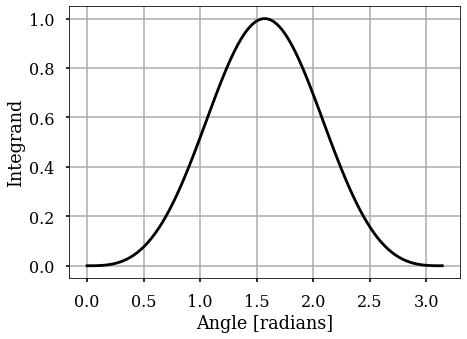

In [6]:
angle = np.linspace(0.0000001,π,100)

P_integral_func = lambda θ: ((np.cos(π*np.cos(θ)/2))**2)/np.sin(θ)
P_integral = P_integral_func(angle)

plt.figure(figsize=(7,5))
plt.plot(angle, P_integral,c="k")
plt.xlabel("Angle [radians]")
plt.ylabel("Integrand")
plt.grid();

In [7]:
# Integral over the almost full solid angle
def integral(x):
    I = ((sp.cos(π*sp.cos(x)/2))**2)/sp.sin(x)
    return I

Integral_ = quad(integral,0.0000001,π)[0]
Integral_

Therefore 

$$
    P_{rad} = \frac{ηI^2_0}{2\pi}\sin^2\left(\omega t + \frac{\pi}{L}r\right) \cdot 1.21883
$$

---

**ISOTROPIC HALF-WAVE DIPOLE ANTENNA**

Isotropic Radiation Intensity $U_{I}$

$$
    U_I = \frac{P_{rad}}{4\pi} = \frac{1}{4\pi} \cdot \frac{ηI^2_0}{2\pi}\sin^2\left(\omega t + \frac{\pi}{L}r\right) \cdot 1.21883
$$

$$
    U_I = \frac{ηI^2_0}{8\pi^2}\sin^2\left(\omega t + \frac{\pi}{L}r\right) \cdot 1.21883
$$

Isotropic Radiation Density is therefore:

$$
    \frac{U_I}{r^2} = \frac{ηI^2_0}{8\pi^2r^2}\sin^2\left(\omega t + \frac{\pi}{L}r\right) \cdot 1.21883
$$

**POWER GAIN**

Radiation intensity: $U(\theta,\varphi) = r^2\:P_r$

Power Gain: $G(\theta,\varphi)$

$$
    G(\theta,\varphi) = \frac{e\cdot4\pi}{P_{rad}}\cdot U(\theta,\varphi) = \frac{e\cdot4\pi}{P_{rad}}\cdot r^2\:P_r
$$

$e$: efficiency; $e \in [0,1]$.

**DIRECTIVITY relative to an isotropic radiator**

$$
    D_m = \frac{4\pi U_{max}}{P_{rad}} = [\:\text{Integral}\:/\:2\:]^{-1}
$$

In [8]:
# Relative to an isotropic radiator
Directivity_max = (Integral_/2)**(-1)
Directivity_max

Another way to express the gain:

$$
    G(\theta,\varphi) = e\cdot D(\theta,\varphi)
$$

So that, Max gain should be: 1.64092.

**DIRECTIVITY GAIN** in dBi
 
$$
    D_{db} = 10\text{Log}_{10}(D_{max})
$$

In [9]:
10*np.log10(Directivity_max)



So that,  $D_{db} = 2.15088$ dB;  with efficienty = 1.

---
**IDEAL EVALUATION**

By setting $η = η_0$ for free space, $η_0 \approx 120π\:Ω$; and, $I_0$ = 1 A.

Recall Fraunhofer (far-field) conditions: $r >> L$ and $r >> 2L^2/\lambda$.

$L = \lambda/2$

The microwave region extends from 1,000 to 300,000 MHz (or 30 cm to 1 mm wavelength).

In [10]:
# Free params
λ  = 500e-3  # m
η  = 120*π # Ω
Io = 1     # A
t  = 10     # s
e  = 1     # efficiencie: 0 <= e <= 1 

# Fixed Values
c = 299792458 # m/s
f = c/λ       # Hz
ω = 2*π*f     # rad/s
L = λ/2       # m

gain  = lambda θ: 2*e*Integral_*(( np.cos(π*np.cos(θ)/2)/np.sin(θ) )**2)

In [11]:
angles = range(1,361)
gain_angle = sp.zeros(360)
for i,Θ in enumerate(angles):
    gain_angle[i] = gain(np.radians(Θ))
    
print(f"\nMax gain: {round(max(gain_angle),4)} with angle: θ = {angles[np.argmax(gain_angle)]} degrees.")
print(f"Gain with 45 degrees is: {round(gain(np.radians(45)),5)}.")


Max gain: 2.4377 with angle: θ = 90 degrees.
Gain with 45 degrees is: 0.96117.


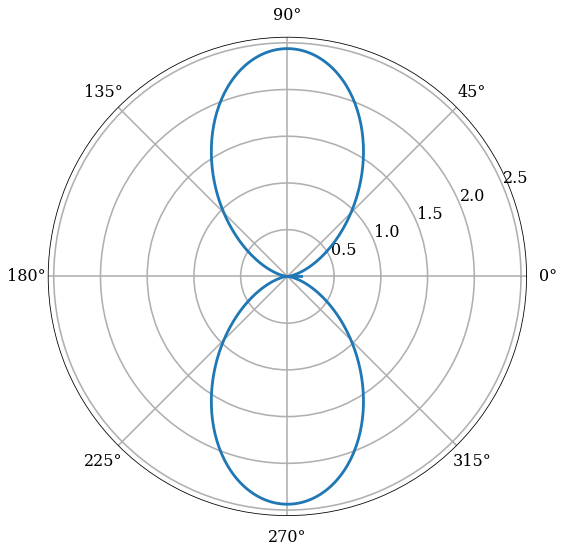

In [12]:
vθ = np.radians(np.linspace(0.0001, 360,500))
r  = 1.7 # m

GAIN = [ gain(φ) for φ in vθ ]

plt.polar(vθ,GAIN);

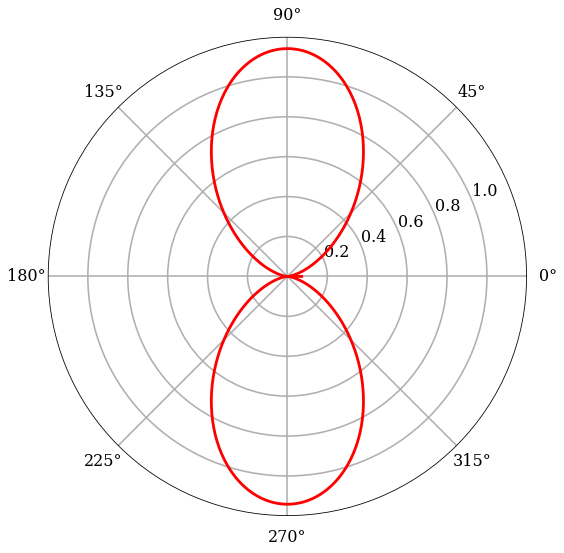

In [13]:
vθ = np.radians(np.linspace(0.0001, 360,500))

P_dens = lambda θ: (η*(Io/(2*π*r))**2)*(np.sin(ω*t + π*r/L)**2)*( (np.cos(π*np.cos(θ)/2)/np.sin(θ))**2 )
P_density = [ P_dens(φ) for φ in vθ ]

plt.polar(vθ,P_density, color="red");

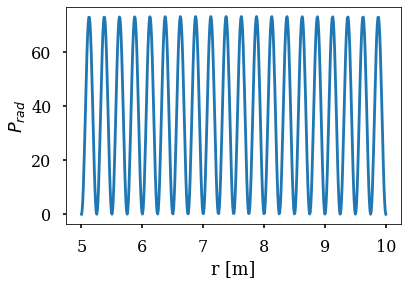

In [14]:
P_rad = lambda r: (η*(Io**2)/(2*π))*Integral_*( (sp.sin( ω*t + (π/L)*r ))**2 )
r  = np.linspace(5,10,500) # m

# Power radiated:
plt.figure(figsize=(6,4))
P_radiated = [P_rad(R) for R in r]
plt.plot(r, P_radiated)
plt.xlabel("r [m]")
plt.ylabel("$P_{rad}$");

### References

1. University of Illinois, Antenna Basics, url: [https://ws.engr.illinois.edu/sitemanager/getfile.asp?id=201](https://ws.engr.illinois.edu/sitemanager/getfile.asp?id=201).
2. Sophocles J. Orfanidis, Electromagnetic Waves and Antennas, p.730-742, Rutgers University, 2016. 